EcoForest 0.8

> **0.7精华版，0.8是一个里程碑，将在其基础上做最后的修改**

- 数据地址：UCI
  - Letter: https://archive.ics.uci.edu/ml/datasets/letter+recognition
- 数据特点：
  - 非常不均衡、缺失值严重、二分类
- 包含内容：
  1. 数据获取
  2. 模型应用
  3. 结果分析

In [1]:
import os
import numpy as np
import pandas as pd
import time
import os.path as osp

# Stage-1：获取数据

In [2]:
import DataHelper
import importlib
from collections import Counter
importlib.reload(DataHelper)

<module 'DataHelper' from 'C:\\github_workspace\\ecoForest\\DataHelper.py'>

In [3]:
# X_train,y_train, X_sub, y_sub = DataHelper.get_driver_data()
# X_train,y_train, X_sub, y_sub = DataHelper.get_yeast_data()
# X_train,y_train, X_sub, y_sub = DataHelper.get_letter_data()

In [4]:
X_train,y_train, X_sub, y_sub = DataHelper.get_adult_data()

X.shape: (32561, 14) y.shape: (32561,)
X.shape: (16281, 14) y.shape: (16281,)


In [6]:
# train = pd.read_csv("./datasetes/adult/adult_train.csv")
# X_train = train.iloc[:, 1:].values 
# y_train = train.iloc[:, 0].values
# X_train.shape, y_train.shape

In [7]:
# test = pd.read_csv("./datasetes/adult/adult_test.csv")
# X_sub = test.iloc[:, 1:].values 
# y_sub = test.iloc[:, 0].values
# X_sub.shape, y_sub.shape

In [6]:
Counter(y_train)

Counter({0: 24720, 1: 7841})

In [5]:
Counter(y_sub)

Counter({0: 12435, 1: 3846})

# Stage-2：模型应用

In [7]:
import ModelUtils
import importlib
from collections import Counter
importlib.reload(ModelUtils)

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<module 'ModelUtils' from 'C:\\github_workspace\\ecoForest\\ModelUtils.py'>

In [8]:
from sklearn import metrics
def acc_metrix_mult(a, p):
#     print(p)
    return "acc", metrics.accuracy_score(a, p)

# DT, RF, GDBT, XGB 算法

In [12]:
ModelUtils.decision_tree(X_train, y_train, X_sub, y_sub, feval=acc_metrix_mult)

train ('acc', 0.99996928841251809)
test ('acc', 0.81358638904244207)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
ModelUtils.random_forest(X_train, y_train, X_sub, y_sub, n_estimators=1000, feval=acc_metrix_mult,\
                         max_depth=None, min_samples_leaf=40, min_samples_split=2)

train ('acc', 0.8627499155431344)
test ('acc', 0.86002088323813031)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
ModelUtils.gdbt_model(X_train, y_train, X_sub, y_sub, n_estimators=200, feval=acc_metrix_mult)

train ('acc', 0.87586376339793004)
test ('acc', 0.87439346477489099)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [14]:
ModelUtils.xgb_model(X_train, y_train, X_sub, y_sub, num_class=2, feval=acc_metrix_mult)

{'objective': 'multi:softmax', 'num_class': 2}
[0]	train-acc:0.855318	valid-acc:0.85609
Multiple eval metrics have been passed: 'valid-acc' will be used for early stopping.

Will train until valid-acc hasn't improved in 500 rounds.
[100]	train-acc:0.908357	valid-acc:0.871814
[200]	train-acc:0.930561	valid-acc:0.869725
[300]	train-acc:0.949203	valid-acc:0.865365
[400]	train-acc:0.963668	valid-acc:0.865303
[500]	train-acc:0.972697	valid-acc:0.864566
Stopping. Best iteration:
[31]	train-acc:0.885661	valid-acc:0.874332

train ('acc', 0.97515432572709682)
test ('acc', 0.86339905411215523)


# BaseLine

In [9]:
ModelUtils.baseline_1_flod(X_train, y_train, X_sub, y_sub, num_class=2, feval=acc_metrix_mult)

X_train.shape, y_train.shape:(32561, 14)(32561,)
X_valid.shape, y_valid.shape:(16281, 14)(16281,)
    cross_score: 0.85277
    test score ('acc', 0.85467723112830907)
train kflod pred: ('acc', 0.85467723112830907)
train pred ('acc', 0.99996928841251809)
test pred ('acc', 0.85467723112830907)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=1023, verbose=0,
            warm_start=False)

In [14]:
ModelUtils.baseline_model(X_train, y_train, X_sub, y_sub, num_class=2, feval=acc_metrix_mult)

X_train.shape, y_train.shape:(26048, 14)(26048,)
X_valid.shape, y_valid.shape:(6513, 14)(6513,)
    cross_score: 0.85567
    test score ('acc', 0.85320312020146183)
X_train.shape, y_train.shape:(26049, 14)(26049,)
X_valid.shape, y_valid.shape:(6512, 14)(6512,)
    cross_score: 0.85258
    test score ('acc', 0.85633560592101221)
X_train.shape, y_train.shape:(26049, 14)(26049,)
X_valid.shape, y_valid.shape:(6512, 14)(6512,)
    cross_score: 0.85519
    test score ('acc', 0.85418586081935999)
X_train.shape, y_train.shape:(26049, 14)(26049,)
X_valid.shape, y_valid.shape:(6512, 14)(6512,)
    cross_score: 0.84874
    test score ('acc', 0.85854677231128307)
X_train.shape, y_train.shape:(26049, 14)(26049,)
X_valid.shape, y_valid.shape:(6512, 14)(6512,)
    cross_score: 0.84905
    test score ('acc', 0.85541428659173269)
train kflod pred: ('acc', 0.85755965725868366)
train pred ('acc', 0.99996928841251809)
test pred ('acc', 0.85633560592101221)
lr train ('acc', 0.85734467614631005)
lr test ('a

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
             oob_score=False, random_state=1023, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
             oob_score=False, random_state=1023, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', ma

# Stage-3：EcoForest

In [12]:
import EnhancedForest_multiclass
import DecomposerForest
import LogUtils
import AlgorithmUtils
import importlib
importlib.reload(DecomposerForest)
importlib.reload(LogUtils)
importlib.reload(EnhancedForest_multiclass)
importlib.reload(AlgorithmUtils)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [13]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_sub, y_sub, num_class=2, flag="adult", isLRStacker=True)
# decoForest.set_parameter(criterion="gini", dropout=-1, min_samples_leaf=10)
decoForest.set_parameter(criterion="gini", dropout=None, min_samples_leaf=10)
decoForest.fit(n_estimators=500, kfold=3, feval=acc_metrix_mult)


2018-01-30 09:23:54 layer: 1


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87534166641073674)
train loss ('acc', 0.87534166641073674)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86216639538097728)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86450463730729066)
pass test loss (0, 0)
pass test loss now (0, 1)
1 [p:0/np:0] 

2018-01-30 09:24:12 layer: 2


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87571020546052025)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87571020546052025)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.8618592795061577)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
2 [p:0/np:16281] 

2018-01-30 09:24:44 layer: 3


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.8758023402229661)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.8758023402229661)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86195141426860356)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86407468828696021)
pass test loss (0, 0)
pass test loss now (0, 1)
3 [p:0/np:16281] 

2018-01-30 09:25:22 layer: 4


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87555664752311047)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87555664752311047)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86204354903104941)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86407468828696021)
pass test loss (0, 0)
pass test loss now (0, 1)
4 [p:0/np:16281] 

2018-01-30 09:26:04 layer: 5


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87607874451030376)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87607874451030376)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86192070268112164)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86413610957557885)
pass test loss (0, 0)
pass test loss now (0, 1)
5 [p:0/np:16281] 

2018-01-30 09:26:51 layer: 6


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87537237799821876)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87537237799821876)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86167500998126589)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86401326699834158)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:27:42 layer: 7


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87592518657289398)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87592518657289398)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86176714474371185)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86450463730729066)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:28:39 layer: 8


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87564878228555632)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87564878228555632)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86139860569392834)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86413610957557885)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:29:40 layer: 9


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87549522434814653)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87549522434814653)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86201283744356749)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86382900313248567)
pass test loss (0, 0)
pass test loss now (0, 1)
9 [p:0/np:16281] 

2018-01-30 09:30:52 layer: 10


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87598660974785791)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87598660974785791)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86210497220601334)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
10 [p:0/np:16281] 

2018-01-30 09:32:04 layer: 11


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87574091704800217)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87574091704800217)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86204354903104941)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86425895215281612)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:33:20 layer: 12


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87595589816037589)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87595589816037589)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86161358680630207)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86432037344143475)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:34:37 layer: 13


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87564878228555632)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87564878228555632)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86146002886889228)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86438179473005339)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:36:13 layer: 14


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87583305181044813)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87583305181044813)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86176714474371185)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86413610957557885)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:38:18 layer: 15


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.8758023402229661)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.8758023402229661)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86170572156874792)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86425895215281612)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:40:17 layer: 16


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87601732133533983)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87601732133533983)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86195141426860356)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86382900313248567)
pass test loss (0, 0)
pass test loss now (0, 1)
16 [p:0/np:16281] 

2018-01-30 09:42:05 layer: 17


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87583305181044813)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87583305181044813)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86222781855594111)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86419753086419748)
pass test loss (0, 0)
pass test loss now (0, 1)
17 [p:0/np:16281] 

2018-01-30 09:43:57 layer: 18


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87549522434814653)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87549522434814653)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86127575934400047)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86419753086419748)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:45:47 layer: 19


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87607874451030376)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87607874451030376)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86192070268112164)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86438179473005339)
pass test loss (0, 0)
pass test loss now (0, 1)
19 [p:0/np:16281] 

2018-01-30 09:48:02 layer: 20


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.8756180706980744)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.8756180706980744)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86167500998126589)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86407468828696021)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:50:42 layer: 21


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87604803292282174)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87604803292282174)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86158287521882004)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86407468828696021)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:53:22 layer: 22


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87546451276066461)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87546451276066461)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86139860569392834)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86438179473005339)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 09:55:58 layer: 23


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87567949387303834)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87567949387303834)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86216639538097728)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86481174375038383)
pass test loss (0, 0)
pass test loss now (0, 1)
23 [p:0/np:16281] 

2018-01-30 09:58:52 layer: 24


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.8756180706980744)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.8756180706980744)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86146002886889228)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86407468828696021)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:02:02 layer: 25


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87592518657289398)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87592518657289398)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86204354903104941)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86419753086419748)
pass test loss (0, 0)
pass test loss now (0, 1)
25 [p:0/np:16281] 

2018-01-30 10:05:41 layer: 26


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87598660974785791)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87598660974785791)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86222781855594111)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86395184570972294)
pass test loss (0, 0)
pass test loss now (0, 1)
26 [p:0/np:16281] 

2018-01-30 10:08:52 layer: 27


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87589447498541195)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87589447498541195)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86210497220601334)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86462747988452793)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:11:57 layer: 28


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87586376339793004)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87586376339793004)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86207426061853132)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86395184570972294)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:15:46 layer: 29


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87549522434814653)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87549522434814653)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86170572156874792)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86401326699834158)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:20:00 layer: 30


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87626301403519546)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87626301403519546)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86235066490586898)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
30 [p:0/np:16281] 

2018-01-30 10:26:19 layer: 31


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87607874451030376)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87607874451030376)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86192070268112164)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86450463730729066)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:32:56 layer: 32


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87567949387303834)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87567949387303834)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86198212585608547)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86389042442110431)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:40:19 layer: 33


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87589447498541195)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87589447498541195)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86201283744356749)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:46:07 layer: 34


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87549522434814653)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87549522434814653)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.8618592795061577)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86401326699834158)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:51:06 layer: 35


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87571020546052025)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87571020546052025)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86201283744356749)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86413610957557885)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 10:56:53 layer: 36


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87549522434814653)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87549522434814653)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86182856791867568)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86419753086419748)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 11:02:44 layer: 37


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87595589816037589)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87595589816037589)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86231995331838707)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86389042442110431)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 11:09:00 layer: 38


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87531095482325483)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87531095482325483)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86204354903104941)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 11:16:43 layer: 39


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87552593593562855)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87552593593562855)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86207426061853132)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86438179473005339)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 11:26:14 layer: 40


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87555664752311047)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87555664752311047)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86142931728141026)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86425895215281612)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 11:35:49 layer: 41


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87552593593562855)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87552593593562855)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86219710696845919)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86407468828696021)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 11:45:21 layer: 42


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87571020546052025)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87571020546052025)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86204354903104941)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86382900313248567)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 11:54:15 layer: 43


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87574091704800217)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87574091704800217)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.8618592795061577)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86425895215281612)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:03:18 layer: 44


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87577162863548419)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87577162863548419)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86207426061853132)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86456605859590929)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:12:28 layer: 45


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87589447498541195)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87589447498541195)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86173643315622983)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:22:17 layer: 46


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87567949387303834)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87567949387303834)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86188999109363962)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86456605859590929)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:27:48 layer: 47


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87552593593562855)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87552593593562855)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86161358680630207)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86401326699834158)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:31:24 layer: 48


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87577162863548419)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87577162863548419)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86198212585608547)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86389042442110431)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:35:13 layer: 49


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87589447498541195)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87589447498541195)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86207426061853132)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86462747988452793)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:39:14 layer: 50


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87552593593562855)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87552593593562855)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86179785633119377)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86413610957557885)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:43:20 layer: 51


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87549522434814653)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87549522434814653)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86213568379349526)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86438179473005339)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:47:36 layer: 52


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87586376339793004)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87586376339793004)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86158287521882004)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86462747988452793)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:52:01 layer: 53


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87595589816037589)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87595589816037589)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86195141426860356)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86395184570972294)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 12:56:35 layer: 54


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87531095482325483)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87531095482325483)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86198212585608547)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86395184570972294)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 13:01:24 layer: 55


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87607874451030376)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87607874451030376)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86204354903104941)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86425895215281612)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 13:06:20 layer: 56


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87543380117318259)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87543380117318259)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86182856791867568)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86419753086419748)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 13:11:33 layer: 57


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.8758023402229661)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.8758023402229661)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86146002886889228)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86413610957557885)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 13:16:59 layer: 58


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87555664752311047)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87555664752311047)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86219710696845919)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86450463730729066)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 13:22:39 layer: 59


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87577162863548419)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87577162863548419)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86136789410644632)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86401326699834158)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 13:28:36 layer: 60


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.8752802432357728)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.8752802432357728)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86198212585608547)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 13:34:45 layer: 61


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87583305181044813)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87583305181044813)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86235066490586898)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86425895215281612)
pass test loss (0, 0)
pass test loss now (0, 1)
61 [p:0/np:16281] 

2018-01-30 13:43:11 layer: 62


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87574091704800217)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87574091704800217)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86235066490586898)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86432037344143475)
pass test loss (0, 0)
pass test loss now (0, 1)
62 [p:0/np:16281] 

2018-01-30 14:00:12 layer: 63


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87577162863548419)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87577162863548419)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86164429839378398)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86389042442110431)
pass test loss (0, 0)
pass test loss now (0, 1)
63 [p:0/np:16281] 

2018-01-30 14:17:39 layer: 64


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87589447498541195)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87589447498541195)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86244279966831483)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86456605859590929)
pass test loss (0, 0)
pass test loss now (0, 1)
64 [p:0/np:16281] 

2018-01-30 14:35:43 layer: 65


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87610945609778568)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87610945609778568)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86210497220601334)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86413610957557885)
pass test loss (0, 0)
pass test loss now (0, 1)
65 [p:0/np:16281] 

2018-01-30 14:52:24 layer: 66


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87604803292282174)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87604803292282174)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86231995331838707)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86444321601867202)
pass test loss (0, 0)
pass test loss now (0, 1)
66 [p:0/np:16281] 

2018-01-30 15:08:24 layer: 67


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87571020546052025)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87571020546052025)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86155216363133813)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86395184570972294)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 15:23:35 layer: 68


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87577162863548419)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87577162863548419)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86164429839378398)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86450463730729066)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 15:36:59 layer: 69


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


all data ('acc', 0.87635514879764131)
[p:0/1:0|n:32561/1:7841] 
train loss ('acc', 0.87635514879764131)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.86188999109363962)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.86450463730729066)
pass test loss (0, 0)
pass test loss now (0, 1)
69 [p:0/np:16281] 
STATUS_BREAK


In [11]:
# 0123
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.86481174375038383,
 [(0, 0.86450463730729066),
  (1, 0.86444321601867202),
  (2, 0.86407468828696021),
  (3, 0.86407468828696021),
  (4, 0.86413610957557885),
  (5, 0.86382900313248567),
  (6, 0.86444321601867202),
  (7, 0.86382900313248567),
  (8, 0.86419753086419748),
  (9, 0.86438179473005339),
  (10, 0.86481174375038383),
  (11, 0.86419753086419748),
  (12, 0.86395184570972294),
  (13, 0.86444321601867202),
  (14, 0.86425895215281612),
  (15, 0.86432037344143475),
  (16, 0.86389042442110431),
  (17, 0.86456605859590929),
  (18, 0.86413610957557885),
  (19, 0.86444321601867202),
  (20, 0.86450463730729066)])

In [86]:
# 0123
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.86542595663657018,
 [(0, 0.86481174375038383),
  (1, 0.86456605859590929),
  (2, 0.86389042442110431),
  (3, 0.86481174375038383),
  (4, 0.86499600761623974),
  (5, 0.86432037344143475),
  (6, 0.86542595663657018)])

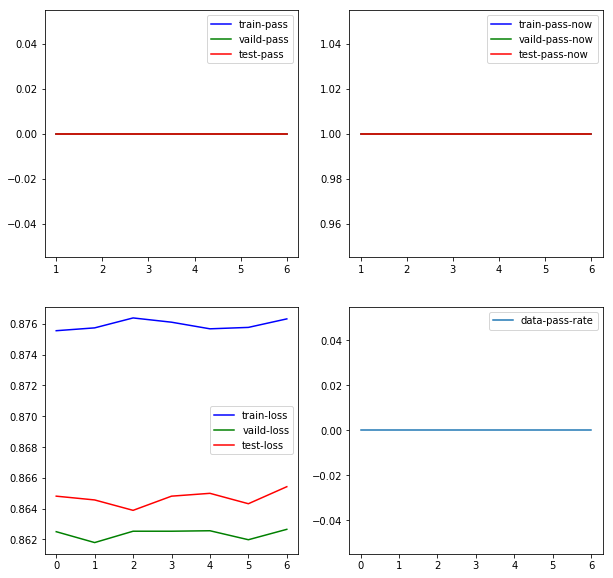

In [72]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [ ]:
# 0123
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

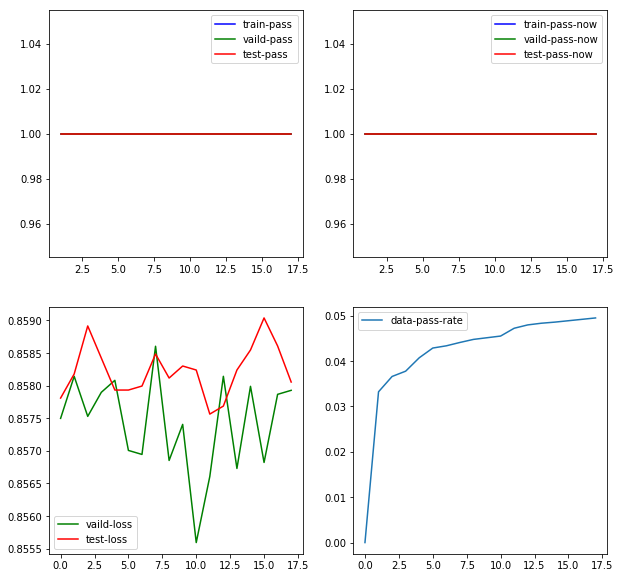

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [15]:
# n=200, criterion="gini", dropout=None, True-lr, kfold=3
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.86026656839260485,
 [(0, 0.85946809164056259),
  (1, 0.85995946194951167),
  (2, 0.85873103617713897),
  (3, 0.86014372581536758),
  (4, 0.86020514710398621),
  (5, 0.86026656839260485)])

In [30]:
# n=500, criterion="gini", dropout=None, True-lr, kfold=20
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.85639702720963085,
 [(0, 0.85639702720963085),
  (1, 0.85621276334377494),
  (2, 0.85633560592101221),
  (3, 0.85615134205515631),
  (4, 0.85627418463239358)])

In [27]:
# n=500, criterion="gini", dropout=None, True-lr
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.85903814262023215,
 [(0, 0.85780971684785945),
  (1, 0.85817824457957126),
  (2, 0.85891530004299488),
  (3, 0.8584239297340458),
  (4, 0.85793255942509672),
  (5, 0.85793255942509672),
  (6, 0.85799398071371535),
  (7, 0.85848535102266443),
  (8, 0.85811682329095262),
  (9, 0.85830108715680853),
  (10, 0.85823966586818989),
  (11, 0.85756403169338491),
  (12, 0.85768687427062218),
  (13, 0.85823966586818989),
  (14, 0.85854677231128307),
  (15, 0.85903814262023215),
  (16, 0.8586081935999017),
  (17, 0.85805540200233399)])

In [24]:
# n=200, criterion="gini", dropout=None, True-lr
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.85909956390885078,
 [(0, 0.85817824457957126),
  (1, 0.85750261040476627),
  (2, 0.85854677231128307),
  (3, 0.85836250844542716),
  (4, 0.85780971684785945),
  (5, 0.85811682329095262),
  (6, 0.85774829555924081),
  (7, 0.8584239297340458),
  (8, 0.85762545298200354),
  (9, 0.85909956390885078),
  (10, 0.85774829555924081),
  (11, 0.85903814262023215),
  (12, 0.85873103617713897),
  (13, 0.85768687427062218),
  (14, 0.85848535102266443)])

In [21]:
# n=200, criterion="gini", dropout=-1, True-lr
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.85879245746575761,
 [(0, 0.85817824457957126),
  (1, 0.85750261040476627),
  (2, 0.85836250844542716),
  (3, 0.85793255942509672),
  (4, 0.85756403169338491),
  (5, 0.85879245746575761),
  (6, 0.85688839751857993),
  (7, 0.85787113813647808),
  (8, 0.8584239297340458),
  (9, 0.85836250844542716),
  (10, 0.85799398071371535),
  (11, 0.85811682329095262),
  (12, 0.85787113813647808),
  (13, 0.85756403169338491)])

# Todo list
- 树结构设计（完成）
- 通过gini对数据分割（完成）
- 全局测试集
- 输出结果集
- 打印信息增加pass data的比例
- 防止过拟合
- 对pass data的进一步处理
- 先进行数据均衡化是不是更快一些